# Double Pendulum

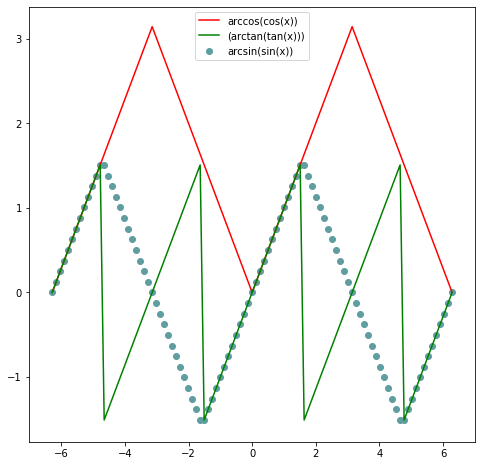

In [2]:
#behavior of functions arccos(cos(x)), arcsin(sin(x)) i arctan(tan(x))
#important for truncating, limiting angles
import matplotlib.pyplot as plt
%matplotlib inline
import math
import numpy as np
from scipy import *

x = linspace(-2*math.pi, 2*math.pi, 101)

def arccoscos(a):
    return np.arccos(np.cos(a))

def arcsinsin(a):
    return np.arcsin(np.sin(a))

def arctantan(a):
    return np.arctan(np.tan(a))

plt.figure(figsize=(8,8))
plt.plot(x, arccoscos(x), label='arccos(cos(x))', color='red')
plt.scatter(x, arcsinsin(x), label='arcsin(sin(x))', color='cadetblue')
plt.plot(x,arctantan(x), label='(arctan(tan(x)))', color='green')
plt.legend()
plt.show()

acc:


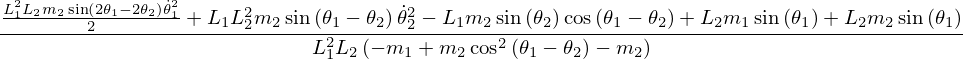

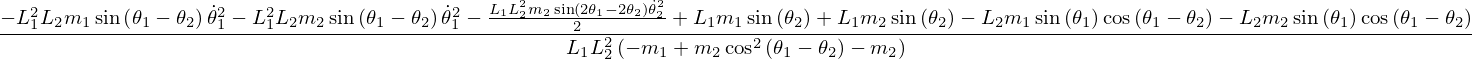

In [6]:
import sympy
from sympy import symbols
from sympy.physics.mechanics import *
from sympy.physics.mechanics import LagrangesMethod, init_vprinting
from sympy.physics.mechanics import Particle, Point, ReferenceFrame

init_vprinting()
#defining variables
t1, t2 = dynamicsymbols('theta_1, theta_2')
t1d, t2d = dynamicsymbols('theta_1, theta_2', 1)
L1, L2, m1, m2, g, t = symbols('L_1, L_2, m_1, m_2, g, t')

#importing a refrence frame for masses
N = ReferenceFrame('N')
A = N.orientnew('A', 'Axis', [t1, N.z])
B = N.orientnew('B', 'Axis', [t2, N.z])

A.set_ang_vel(N, t1d * N.z)
B.set_ang_vel(N, t2d * N.z)

O = Point('O')
P = O.locatenew('P', L1 * A.x)
R = P.locatenew('R', L2 * B.x)

O.set_vel(N, 0)
P.v2pt_theory(O, N, A)
R.v2pt_theory(P, N, B)

ParP = Particle('ParP', P, m1)
ParR = Particle('ParR', R, m2)
#kinetic energy
T = sympy.Rational(1/2)*(m1*(sympy.Pow(L1,2))*(sympy.Pow(t1d,2)) + 
                         m2*((sympy.Pow(L1,2))*(sympy.Pow(t1d,2))+
                             (sympy.Pow(L2,2))*(sympy.Pow(t2d,2))+2*L1*L2*t1d*t2d*sympy.cos(t1-t2)))

#potential energy
U = -(m1+m2)*sympy.cos(t1) - m2*sympy.cos(t2)
#Lagrangian
L = T - U
forces = []
LM = LagrangesMethod(L, [t1, t2], forcelist = forces, frame = N)
LM.form_lagranges_equations()

lrhs = LM.rhs()
lrhs.simplify()
#solution matrix, first row represents velocities, second accelerations
print('acc:')
display(lrhs[2], lrhs[3])

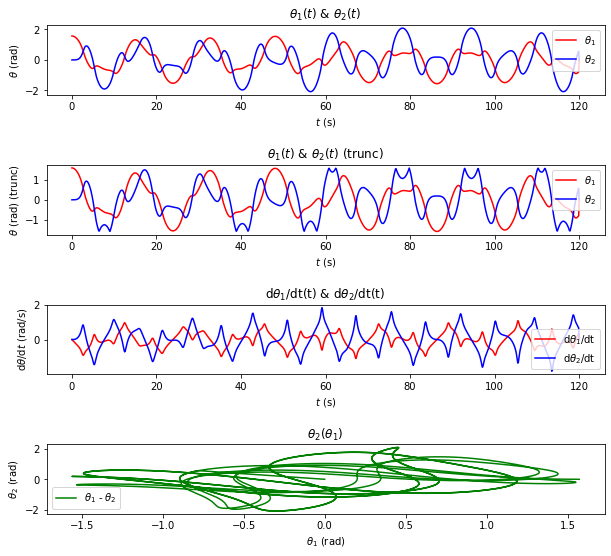

In [8]:
import numpy as np
from scipy.integrate import ode
import matplotlib.pyplot as plt
%matplotlib inline

q1, q2, u1, u2 = symbols('q_1, q_2, u_1, u_2', cls = sympy.Function)
w = [q1(t), q2(t), u1(t), u2(t)]
#changing variables, initial conditions
sub_params = {t1: q1(t),
              t2: q2(t),
              t1d: u1(t), 
              t2d: u2(t),
              g : 9.81,
              m1 : 1.0,
              m2 : 1.5,
              L1 : 2.0,
              L2 : 1.5}
eq_of_motion = sympy.lambdify((t, w), lrhs.subs(sub_params))

t1_init = np.pi/2 
t2_init = 0.0
t1d_init = 0.0
t2d_init = 0.0
#saving initial conditions for angles and velocities
initc = [t1_init, t2_init, t1d_init, t2d_init]
n = 120.0 #time period
nt = 1001 #number of points
sim_time = np.linspace(0.0, n, nt)

r = ode(eq_of_motion).set_initial_value(initc, sim_time[0])

dt = sim_time[1] - sim_time[0]   
odg = np.zeros((len(sim_time), len(initc))) #solutions of differential equations
index = 0
#integrating
while r.successful() and r.t < sim_time[-1]:
    odg[index, :] = r.y
    r.integrate(r.t + dt)
    index += 1
#first column is theta1, second theta2, third and fourth are angular velocities
#plotting solutions
def plotSolution(t,w):
    fig, ax = plt.subplots(nrows=4,figsize=(10,9))
    plt.subplots_adjust(hspace=1.0)
    ax[0].plot(sim_time,odg[:,0],label=r'$\theta_1$',color='red')
    ax[0].plot(sim_time,odg[:,1],label=r'$\theta_2$',color='blue')
    ax[0].set_xlabel(r'$t$ (s)')
    ax[0].set_ylabel(r'$\theta$ (rad)')
    ax[0].set_title(r'$\theta_1(t)$ & $\theta_2(t)$')
    ax[0].legend()
    ax[1].plot(sim_time,arcsinsin(odg[:,0]),label=r'$\theta_1$',color='red')
    ax[1].plot(sim_time,arcsinsin(odg[:,1]),label=r'$\theta_2$',color='blue')
    ax[1].set_xlabel(r'$t$ (s)')
    ax[1].set_ylabel( r'$\theta$ (rad) (trunc)')
    ax[1].set_title(r'$\theta_1(t)$ & $\theta_2(t)$ (trunc)')
    ax[1].legend()
    ax[2].plot(sim_time,odg[:,2],label=r'd$\theta_1$/dt',color='red')
    ax[2].plot(sim_time,odg[:,3],label=r'd$\theta_2$/dt',color='blue')
    ax[2].set_xlabel(r'$t$ (s)')
    ax[2].set_ylabel(r'$\mathrm{d}\theta/\mathrm{d}t$ (rad/s)')
    ax[2].set_title(r'd$\theta_1$/dt(t) & d$\theta_2$/dt(t)')
    ax[2].legend()
    ax[3].plot(odg[:,0],odg[:,1],label=r'$\theta_1$ - $\theta_2$',color='green')
    ax[3].set_xlabel(r'$\theta_1$ (rad)')
    ax[3].set_ylabel(r'$\theta_2$ (rad)')
    ax[3].set_title(r'$\theta_2$($\theta_1$)')
    ax[3].legend()

plotSolution(t,w)

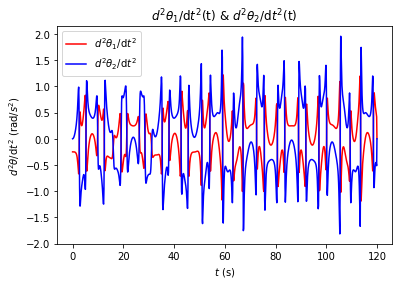

In [9]:
#plotting accelerations
acc1 = np.zeros((len(sim_time), 1))
acc2 = np.zeros((len(sim_time), 1))

a1 = lrhs[2]
a2 = lrhs[3]
a1 = a1.subs(sub_params)
a2 = a2.subs(sub_params)

for i in range(0,len(sim_time),1):
    repl = {q1(t) : odg[i,0],
            q2(t) : odg[i,1],
            u1(t) : odg[i,2],
            u2(t) : odg[i,3]}
    acc1[i,:] = a1.subs(repl)
    acc2[i,:] = a2.subs(repl)
               
plt.figure(figsize=(6,4))
plt.plot(sim_time,acc1[:,0],label=r'$d^2$$\theta_1$/d$t^2$',color='red')
plt.plot(sim_time,acc2[:,0],label=r'$d^2$$\theta_2$/d$t^2$',color='blue')
plt.xlabel(r'$t$ (s)')
plt.ylabel(r'$d^2$$\theta$/d$t^2$ (rad/$s^2$)')
plt.title(r'$d^2$$\theta_1$/d$t^2$(t) & $d^2$$\theta_2$/d$t^2$(t)')
plt.legend()

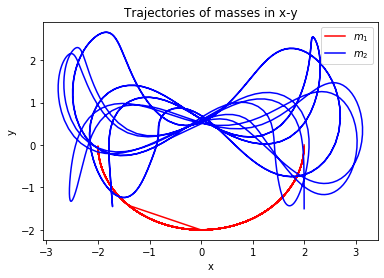

In [10]:
#trajectories of masses
x1, x2, y1, y2 = symbols('x_1, x_2, y_1, y_2', cls=sympy.Function)
x1 = L1*sympy.sin(t1)
x2 = x1 + L2*sympy.sin(t2)
y1 = -L1*sympy.cos(t1)
y2 = -y1 - L2*sympy.cos(t2)
L1 = 2.0
L2 = 1.5
x_1 = np.zeros((len(sim_time), 1))
x_2 = np.zeros((len(sim_time), 1))
y_1 = np.zeros((len(sim_time), 1))
y_2 = np.zeros((len(sim_time), 1))
for i in range(0,nt,1):
        x_1[i,:] = L1*np.sin(odg[i,0])
        y_1[i,:] = - L1*np.cos(odg[i,0])
        x_2[i,:] = x_1[i,:] + L2*np.sin(odg[i,1])
        y_2[i,:] = - y_1[i,:] - L2*np.cos(odg[i,1])

plt.figure(figsize=(6,4))
plt.plot(x_1[:,0],y_1[:,0], label=r'$m_1$', color='red')
plt.plot(x_2[:,0],y_2[:,0], label=r'$m_2$',color='blue')
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.title(r'Trajectories of masses in x-y')
plt.legend()
plt.show()